# Etapes de feature engineering à mettre en place

1. Détecter les features (colonnes) corélées et les supprimer si certaines n'amènent pas de nouvelles informations. Seaborn est une librairie qui permet de visualiser cela 'joliment' et donc efficacement. Vous avez un exemple ci-dessous dans le code.

> Si les corrélation dépassent un certain seuil (qui peut être testé au cours des itérations sur le modèle prédictif, on peut supprimer une ou plusieurs colonnes relatives)

2. Imputation : trouver les valeurs manquantes et décider quoi en faire.
On peut:
- enlever les lignes s'il n'y en a pas trop  
    ``` data = data.loc[data.isnull().mean(axis=1) < 0.8]	```  
- enlever la colonne si elle ne semble pas utile et que beaucoup de valeurs manquent  
    ``` data = data[data.columns[data.isnull().mean() < 0.8]]	```  
- remplacer les valeurs manquantes par des valeurs neutres (moyenne, médiane...)  
   ``` data = data.fillna(0)  	```  
    ``` data = data.fillna(data.median())  	```  


3. Détecter et gérer les outliers (valeurs aberrantes)
On peut:
- utiliser la déviation par rapport à l'écart type et ne garder que les valeurs acceptables

 	``` factor = 3	```  
	``` upper_lim = data['column'].mean () + data['column'].std () * factor	```  
	``` lower_lim = data['column'].mean () - data['column'].std () * factor	```  
	``` data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]	```  

- positionner un seuil à 5%  
 	``` upper_lim = data['column'].quantile(.95)	```  
 	``` lower_lim = data['column'].quantile(.05)	```  
 	``` data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]	```  

- imposer le seuil comme valeur de remplacement  
 	``` upper_lim = data['column'].quantile(.95)	```  
 	``` lower_lim = data['column'].quantile(.05)	```  
	``` data.loc[(df[column] > upper_lim),column] = upper_lim	```  
	```  data.loc[(df[column] < lower_lim),column] = lower_lim	``` 


4. Catégoriser des variables
- c'est typiquement l'exemple des âges qui sont souvent trop répartis et qu'on préfère catégoriser pour améliorer les prédictions finales  
	```  data['bin'] = pd.cut(data['value'], bins=[0,20,50,100], labels=["Kid", "Adult", "Elderly"])	```  

5. Transformer les variables catégorielles, car les modèles de prédiction ne peuvent prendre que des valeurs numériques en entrée  
- one peut utiliser one-hot-encoder :

	```  encoded_columns = pd.get_dummies(data['column'])	```  
	```  data = data.join(encoded_columns).drop('column', axis=1)	```  

6. Découpage des données, comme par exemple le tableau  
France (Europe)  
Allemagne (Europe)  
Etats-Unis (Amérique du Nord)  
Chili (Amérique du Sud)  
Italie (Europe)  
	```  data.pays.str.split("(", n=1, expand=True)[1].str.split(")", n=1, expand=True)[0] ```  

7. Mise à l'échelle des données : on ne peut pas comparer des valeurs qui ne sont pas distribuées dans le même intervalle. On verra dans les cours suivants que certains modèles sont sensibles (KNN, SVM...) alors que d'autres, de par leur fonctionnement, n'y sont peu ou pas sensibles (arbres de décision et méthode ensemblistes relatives aux arbres...)

On peut:
- Normaliser les données selon une mise à l'échelle linéaire entre 0 et 1. Comme c'est linéaire, la distribution reste inchangée, en revanche les outliers ont par conséquent un fort impact, il vaut mieux les avoir gérés en amont!  

	```  from sklearn.preprocessing import MinMaxScaler	```  
	```  data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})	```  
	```  scaler = MinMaxScaler()	```  
	```  scaler.fit(data)	```  
	```  data['scaled'] = pd.DataFrame(scaler.transform(data))	```  

- Standardiser les données permet de plutôt prendre en compte la déviation des données par rapport à l'écart-type, c'est pratique quand les données montrent une distribution gaussienne

	```  from sklearn.preprocessing import StandardScaler	```  
	```  data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})	```  
	```  scaler = StandardScaler()	```  
	```  scaler.fit(data)	```  
	```  data['standardized'] = pd.DataFrame(scaler.transform(data))	```





# Mise en pratique

Vous avez à disposition un dataset de logements loués sur Airbnb.  
A vous de mettre en pratique les éléments de features engineering qui vous semblent les plus appropriés afin de préparer votre dataset.

Les bonnes pratiques sont les suivantes:
1. Dans la première cellule, on réalise tous les imports des librairies utiles pour la suite du projet
2. Eventuellement on propose en commentaire ensuite les lignes d'installation des librairies moins usuelles
>par exemple , 	
    ``` pip install pandas	```  

3. On importe les datasets. Ceux-ci sont généralement sous format csv. La librairie Pandas permet de les importer facilement sous forme de DataFrame.  
Le DataFrame de Pandas est une classe extrêment puissante pour gérer des tables de données volumineuses avec une arithmétique très simple à prendre en main permettant de retravailler à l'envie les lignes et colonnes.  
Vous trouverez à ce [lien](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) toute la documentation de cette classe.  
Intéressez-vous en particulier aux attributs et méthodes de la classe qui permettent souvent de ne pas ré-inventer la roue dans l'étape de Feature Engineering.

4. Nous utilisons ici un Notebook Jupyter avec du langage Python et Markdown. C'est une pratique très courante en data science, mais néanmoins un peu éloignée des bonnes pratiques d'un développeur Python 'pur jus'.

- Les cellules exécutées en Python vous permettent de traiter vos données étapes par étapes, sans forcément prendre le temps de créer des classes et méthodes comme un développeur Python le ferait.  
- Le markdown vous permet quant à lui d'intercaler des explications détaillées au cours de votre analyse de données. C'est très pratique pour expliquer pédagogiquement le déroulé du traitement de données  

-  Un notebook Jupyter est donc hyper efficace pour la data science mais ne permet pas de déployer un modèle de prédiction sur un serveur en run-time. Il s'agit réeellement d'une phase de bac-à-sable pour entraîner les modèles mais non les déployer.

## Import des librairies

In [58]:
# pour traiter les tables de données
import pandas as pd
import numpy as np

# pour réaliser des visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# geographiques
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
# import geoplot

# pour pré-traiter les données
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



# installation des librairies:
# pip install matplotlib
# pip install scikit-learn
# pip install seaborn
# pip install shapely
# pip install geopandas


## Import du dataset et description

Ce dataset représente des données Airbnb anonymisées et accessibles sur le site [Kaggle](https://www.kaggle.com/code/ryanholbrook/mutual-information/data).  
Ces données ne concernent que New-York City et dans la colonne *neighbourhoods* on trouve le groupe de quartier (on dirait sans doute arrondissement à Paris) puis entre parenthèses le quartier spécifique.  

In [59]:
dfAirBnb = pd.read_csv("airbnb.csv", sep=";")
dfAirBnb = dfAirBnb.drop(columns="Unnamed: 0")
dfAirBnb

,id,name,host_id,host_name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhoods
0,2539,Clean & quiet apt home by the park,2787,John,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Brooklyn (Kensington)
1,2595,Skylit Midtown Castle,2845,Jennifer,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Manhattan (Midtown)
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,Manhattan (Harlem)
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Brooklyn (Clinton Hill)
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Manhattan (East Harlem)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,Brooklyn (Bedford-Stuyvesant)
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,Brooklyn (Bushwick)
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,Manhattan (Harlem)
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,Manhattan (Hell's Kitchen)


In [60]:
# certaines colonnes ne sont pas numériques. On créé un autre dataframe uniquement numérique pour observer leur distribution
dfAirBnbNum = dfAirBnb.drop(columns=['name', 'host_name', 'room_type', 'neighbourhoods', 'last_review'])

In [61]:
dfAirBnbNum.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


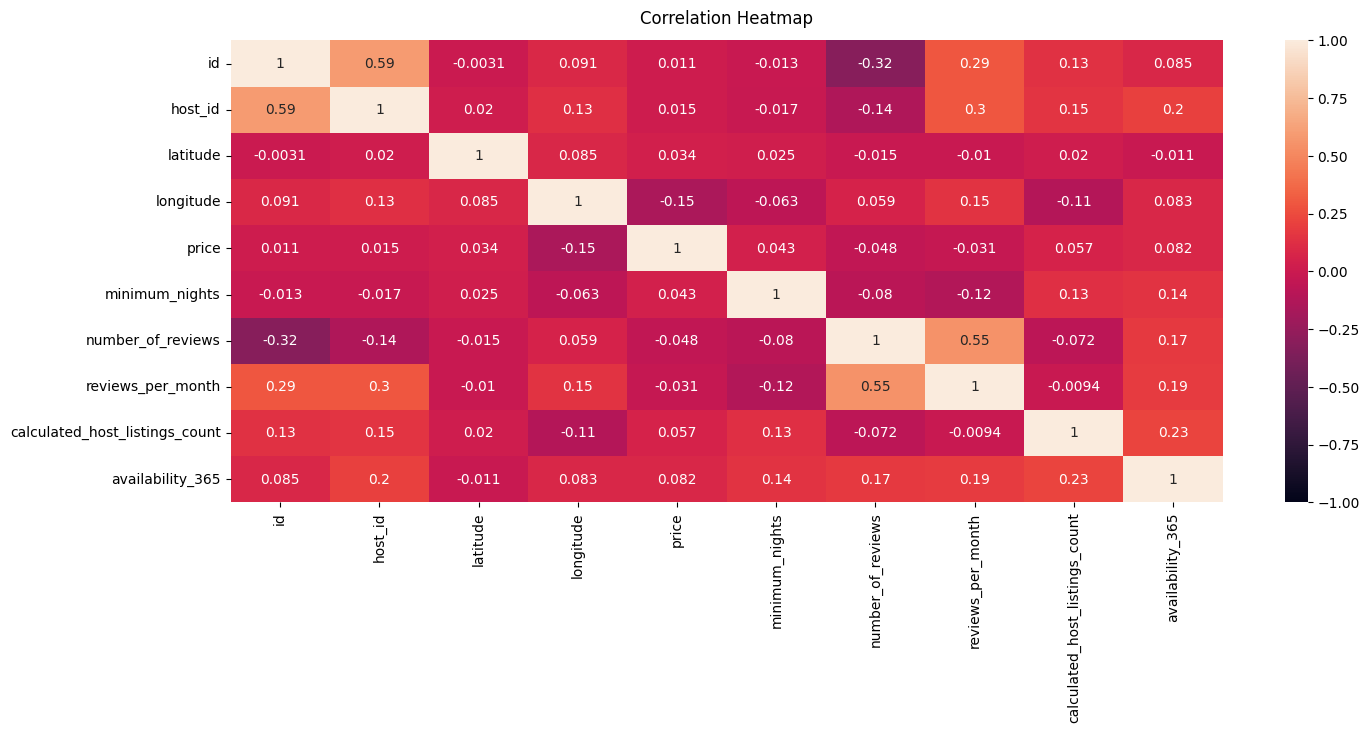

In [62]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dfAirBnbNum.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [63]:

dfAirBnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [64]:
# on peut visualiser cela de manière géographique
geometry = [Point(xy) for xy in zip(dfAirBnb['longitude'], dfAirBnb['latitude'])]
gdf = GeoDataFrame(dfAirBnb, geometry=geometry)   

#this is a simple map that goes with geopandas
# boroughs = gpd.read_file(geoplot.datasets.get_path('nyc_boroughs'))
# gdf.plot(ax=boroughs.plot(figsize=(10, 6)), marker='.', color='red', markersize=5)

## Feature engineering

### Gestion des corrélations, le cas échéant

### Imputation

In [65]:
dfAirBnb["reviews_per_month"] = dfAirBnb["reviews_per_month"].fillna(0)
dfAirBnb

,id,name,host_id,host_name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhoods
0,2539,Clean & quiet apt home by the park,2787,John,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Brooklyn (Kensington)
1,2595,Skylit Midtown Castle,2845,Jennifer,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Manhattan (Midtown)
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,Manhattan (Harlem)
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Brooklyn (Clinton Hill)
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Manhattan (East Harlem)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,40.67853,-73.94995,Private room,70,2,0,NaN,0.00,2,9,Brooklyn (Bedford-Stuyvesant)
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,40.70184,-73.93317,Private room,40,4,0,NaN,0.00,2,36,Brooklyn (Bushwick)
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.00,1,27,Manhattan (Harlem)
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,40.75751,-73.99112,Shared room,55,1,0,NaN,0.00,6,2,Manhattan (Hell's Kitchen)


### Gestion des outliers

Axes(0.125,0.11;0.775x0.77)


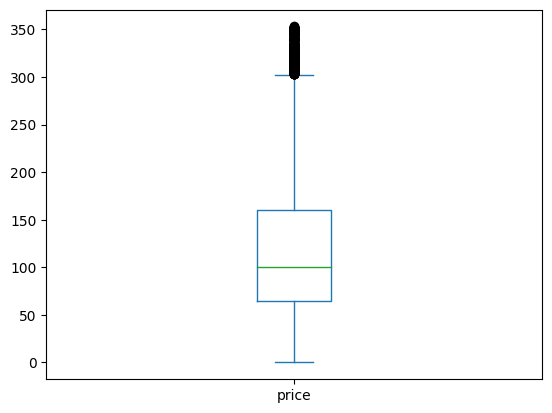

In [66]:
upper_lim = dfAirBnb['price'].quantile(.95)
dfAirBnb = dfAirBnb[dfAirBnb['price']< upper_lim]
print(dfAirBnb['price'].plot.box())


### Création de catégories, si besoin

In [67]:
dfAirBnb['bin_price'] = pd.cut(dfAirBnb['price'], bins=[0, 2000, 5000, 8000], labels=[1, 2, 3], right=False)
dfAirBnb

C:\Users\emac\AppData\Local\Temp\ipykernel_13012\3762576408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAirBnb['bin_price'] = pd.cut(dfAirBnb['price'], bins=[0, 2000, 5000, 8000], labels=[1, 2, 3], right=False)


,id,name,host_id,host_name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhoods,bin_price
0,2539,Clean & quiet apt home by the park,2787,John,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Brooklyn (Kensington),1
1,2595,Skylit Midtown Castle,2845,Jennifer,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Manhattan (Midtown),1
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,Manhattan (Harlem),1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Brooklyn (Clinton Hill),1
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Manhattan (East Harlem),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,40.67853,-73.94995,Private room,70,2,0,NaN,0.00,2,9,Brooklyn (Bedford-Stuyvesant),1
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,40.70184,-73.93317,Private room,40,4,0,NaN,0.00,2,36,Brooklyn (Bushwick),1
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.00,1,27,Manhattan (Harlem),1
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,40.75751,-73.99112,Shared room,55,1,0,NaN,0.00,6,2,Manhattan (Hell's Kitchen),1


### Transformation des variables catégorielles

In [68]:
room_type_encoded = pd.get_dummies(dfAirBnb['room_type'], prefix='room_type')
dfAirBnb = dfAirBnb.join(room_type_encoded).drop("room_type", axis=1)

### Découpage des données, si besoin

In [69]:
dfAirBnb['neighbourhoods'] = dfAirBnb['neighbourhoods'].str.split("(", n=1, expand=True)[1].str.split(")", n=1, expand=True)[0]

### Mise à l'échelles des données

In [70]:
dfAirBnb
dfAirBnb = dfAirBnb.drop(columns=['id', 'name', 'host_id', 'host_name', 'last_review'])

In [71]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder = LabelEncoder()
dfAirBnb["neighbourhoods"] = label_encoder.fit_transform(dfAirBnb["neighbourhoods"])

scaler = StandardScaler()	
scaler.fit(dfAirBnb)	
dfAirBnb['standardized'] = pd.DataFrame(scaler.transform(dfAirBnb))

ValueError: Cannot set a DataFrame with multiple columns to the single column standardized